In [ ]:
'''!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)'''

"!sudo apt-get install -y fonts-nanum\n!sudo fc-cache -fv\n!rm ~/.cache/matplotlib -rf\n!apt-get update -qq\n!apt-get install fonts-nanum* -qq\nimport matplotlib.font_manager as fm\nimport warnings\nwarnings.filterwarnings(action='ignore')\npath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕\nfont_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10\nplt.rc('font', family=font_name)"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
0,1960-01-01,2.2,-5.2,7.4,NaN,68.3,1.7,6.7,NaN,NaN,-1.6
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,NaN,NaN,-1.9
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,NaN,NaN,4.0
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,NaN,NaN,7.5
4,1960-01-05,1.3,-8.2,9.5,NaN,44.0,5.1,8.2,NaN,NaN,-4.6


In [ ]:
df.describe()

,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
count,23008.000000,23008.000000,23007.000000,9150.000000,23011.000000,23007.000000,22893.000000,18149.000000,22645.000000,23011.000000
mean,17.071714,8.451960,8.619277,9.593683,65.202851,2.380993,5.858826,11.933170,48.653526,12.415419
std,10.714471,10.578285,2.907096,21.966135,14.549077,0.947595,3.816941,6.419122,31.662321,10.489515
min,-13.600000,-20.200000,1.000000,0.000000,17.900000,0.100000,0.000000,0.000000,0.000000,-16.400000
25%,7.800000,-0.300000,6.600000,0.100000,54.900000,1.700000,2.200000,7.000000,17.800000,3.400000
50%,18.900000,9.200000,8.600000,1.400000,65.500000,2.200000,6.600000,11.220000,55.700000,13.800000
75%,26.400000,17.900000,10.600000,8.500000,75.800000,2.900000,9.000000,16.620000,78.000000,21.800000
max,39.600000,30.300000,19.600000,332.800000,99.800000,7.800000,13.700000,33.480000,96.900000,33.700000


In [ ]:
df[df.duplicated()]

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온


In [ ]:
df.isnull().sum()

일시          0
최고기온        3
최저기온        3
일교차         4
강수량     13861
평균습도        0
평균풍속        4
일조합       118
일사합      4862
일조율       366
평균기온        0
dtype: int64

<ipython-input-125-a17f40780fac>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='0.2f', cmap='Blues')
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


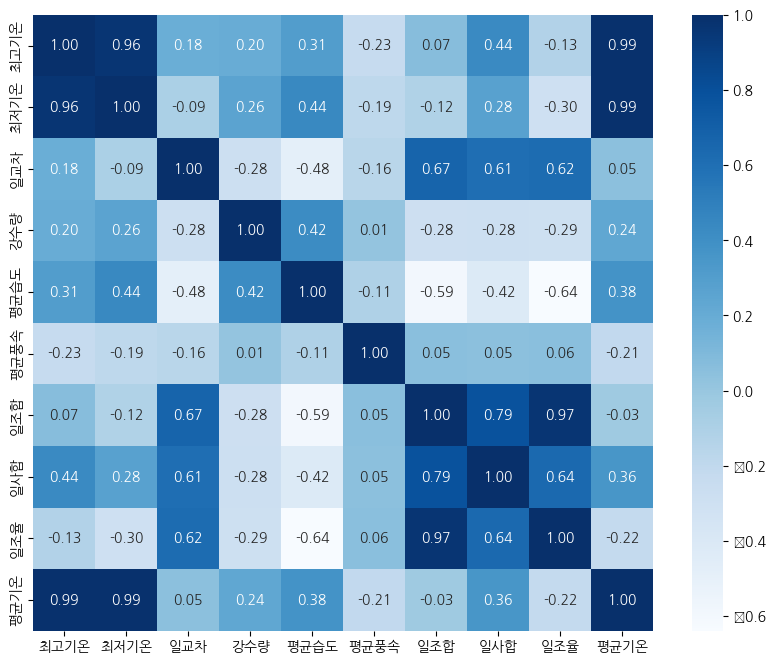

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='0.2f', cmap='Blues')

## 최고기온, 최저기온, 일교차 결측치 처리
### 최고, 최적 기온 : 전날과 그 다음날의 평균으로 처리
### 일교차 : 최고 기온 - 최저 기온

In [ ]:
#df['일시'] = pd.to_datetime(df['일시'])  # '일시' 열을 날짜 형식으로 변환

# 최고기온과 최저기온 결측치 처리
df['최고기온'] = df['최고기온'].fillna(df['최고기온'].interpolate())
df['최저기온'] = df['최저기온'].fillna(df['최저기온'].interpolate())

# 일교차 결측치 처리
df['일교차'] = df['일교차'].fillna(df['최고기온'] - df['최저기온'])


### 강수량 결측치 처리
### 습도와의 상관관계 분석 후 처리

In [ ]:
df.head()

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
0,1960-01-01,2.2,-5.2,7.4,NaN,68.3,1.7,6.7,NaN,NaN,-1.6
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,NaN,NaN,-1.9
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,NaN,NaN,4.0
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,NaN,NaN,7.5
4,1960-01-05,1.3,-8.2,9.5,NaN,44.0,5.1,8.2,NaN,NaN,-4.6


In [ ]:
df[df['평균습도'] <= 80]

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
0,1960-01-01,2.2,-5.2,7.4,NaN,68.3,1.7,6.7,NaN,NaN,-1.6
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,NaN,NaN,7.5
4,1960-01-05,1.3,-8.2,9.5,NaN,44.0,5.1,8.2,NaN,NaN,-4.6
5,1960-01-06,-1.2,-9.5,8.3,0.0,51.3,1.8,7.7,NaN,NaN,-5.2
6,1960-01-07,6.0,-3.5,9.5,0.1,74.0,1.3,1.9,NaN,NaN,1.3
...,...,...,...,...,...,...,...,...,...,...,...
23006,2022-12-27,3.3,-7.3,10.6,NaN,69.8,1.8,8.8,10.25,91.7,-2.6
23007,2022-12-28,0.1,-6.0,6.1,0.1,58.1,2.5,8.7,10.86,90.6,-3.3
23008,2022-12-29,2.1,-7.8,9.9,0.0,56.3,1.7,9.0,10.88,93.8,-2.9
23009,2022-12-30,2.3,-4.4,6.7,0.0,65.6,1.9,7.9,10.84,82.3,-1.8


In [ ]:
# 평균습도가 80 이하인 행의 강수량 결측치를 0으로 처리
df.loc[df['평균습도'] <= 80, '강수량'] = df.loc[df['평균습도'] <= 80, '강수량'].fillna(0)
df.head()

df.isnull().sum()

일시         0
최고기온       0
최저기온       0
일교차        0
강수량      483
평균습도       0
평균풍속       4
일조합      118
일사합     4862
일조율      366
평균기온       0
dtype: int64

In [ ]:
# 강수량이 nan이고 평균습도가 90 이상인 행 출력
selected_rows = df[(df['강수량'].isna()) & (df['평균습도'] >= 90)]
selected_rows.head()

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
2593,1967-02-06,1.0,-2.2,3.2,NaN,91.8,1.6,0.4,NaN,3.8,-0.8
3246,1968-11-20,13.2,7.8,5.4,NaN,90.5,1.3,0.2,NaN,2.0,9.8
4026,1971-01-09,3.0,-2.6,5.6,NaN,90.0,1.3,0.0,NaN,0.0,-0.4
4387,1972-01-05,2.0,-0.7,2.7,NaN,91.8,2.3,0.0,NaN,0.0,0.7
4744,1972-12-27,5.0,0.0,5.0,NaN,92.8,1.3,0.0,NaN,0.0,2.3


In [ ]:
# 강수량이 nan인 행 중에서 가장 높은 평균습도 찾기
max_humidity = df[df['강수량'].isna()]['평균습도'].max()
max_humidity

92.8

In [ ]:
df['강수량'].fillna(0, inplace=True)

## 평균풍속 결측치 처리
### 전날과 다음날 평균으로 처리

In [ ]:
df['평균풍속'] = df['평균풍속'].fillna(df['평균풍속'].interpolate())

In [ ]:
df.isnull().sum()

일시         0
최고기온       0
최저기온       0
일교차        0
강수량        0
평균습도       0
평균풍속       0
일조합      118
일사합     4862
일조율      366
평균기온       0
dtype: int64

## 상관관계가 높은 일조합, 일사합, 일조율 中 일조합만 채택 -> 차원 축소
### 나머지 칼럼 drop

In [ ]:
df2 = df.drop(['일사합', '일조율'], axis=1)

In [ ]:
df2[df['일조합'].isnull()]

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,평균기온
1870,1965-02-13,5.4,0.4,5.0,1.6,81.0,2.8,NaN,2.1
1891,1965-03-06,0.2,-5.6,5.8,0.6,77.8,1.9,NaN,-2.6
1900,1965-03-15,11.4,0.8,10.6,10.5,88.0,3.3,NaN,5.2
1901,1965-03-16,3.4,0.3,3.1,3.3,89.8,2.2,NaN,1.6
1935,1965-04-19,10.0,6.8,3.2,2.5,78.8,3.5,NaN,8.5
...,...,...,...,...,...,...,...,...,...
21230,2018-02-15,4.0,-3.7,7.7,0.0,28.0,2.5,NaN,-0.7
21372,2018-07-07,29.2,19.5,9.7,0.0,51.4,1.6,NaN,23.7
21789,2019-08-28,30.2,23.6,6.6,0.0,66.2,1.9,NaN,26.1
22287,2021-01-07,-8.4,-16.5,8.1,0.0,49.9,4.1,NaN,-14.5


In [ ]:
df2.head()

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,평균기온
0,1960-01-01,2.2,-5.2,7.4,0.0,68.3,1.7,6.7,-1.6
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,-1.9
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,4.0
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,7.5
4,1960-01-05,1.3,-8.2,9.5,0.0,44.0,5.1,8.2,-4.6


In [ ]:
df=df2.drop('일조합', axis=1)
df.head()

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,평균기온
0,1960-01-01,2.2,-5.2,7.4,0.0,68.3,1.7,-1.6
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,-1.9
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,4.0
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,7.5
4,1960-01-05,1.3,-8.2,9.5,0.0,44.0,5.1,-4.6


## 이상치 제거

In [ ]:
def treatment_outlier(col, data) :
    # IQR 계산
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    # 이상치 제거
    data = data[~((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR)))]
    return data

## train, test data 분할

In [ ]:
X_data = df.loc[:,'최고기온':'평균풍속']
X_data.head()

,최고기온,최저기온,일교차,강수량,평균습도,평균풍속
0,2.2,-5.2,7.4,0.0,68.3,1.7
1,1.2,-5.6,6.8,0.4,87.7,1.3
2,8.7,-2.1,10.8,0.0,81.3,3.0
3,10.8,1.2,9.6,0.0,79.7,4.4
4,1.3,-8.2,9.5,0.0,44.0,5.1


In [ ]:
y_data = df.loc[:,'평균기온']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [ ]:
df.columns[1:-1]

Index(['최고기온', '최저기온', '일교차', '강수량', '평균습도', '평균풍속'], dtype='object')

In [ ]:
col_preprocessing = df.columns[1:-1]
for col in col_preprocessing :
    p_data = treatment_outlier(col, df)

p_data.head()

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,평균기온
0,1960-01-01,2.2,-5.2,7.4,0.0,68.3,1.7,-1.6
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,-1.9
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,4.0
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,7.5
5,1960-01-06,-1.2,-9.5,8.3,0.0,51.3,1.8,-5.2


In [ ]:
X_data = p_data.loc[:,'최고기온':'평균풍속']
y_data = p_data.loc[:,'평균기온']
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((17908, 6), (17908,), (4477, 6), (4477,))

## 모델 예측

In [ ]:
# 선형 회귀 모델 생성 및 학습
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 예측
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

# MAE,MSE 계산
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"MAE : {test_mae}, MSE : {test_mse}")

MAE : 0.3884808388658527, MSE : 0.25368224934216677
